# El modelo y corpus reg1d

Llamamos reg1d al modelo de regresión polinómica (de grado dos) simple (en 1d) que Kevin Murphy emplea para ilustrar conceptos básicos en regresión (Sección 1.2.2), sobreajuste y generalización (Sección 1.2.3). Se trata de un modelo artificial con el que podemos generar datos sintéticos y simular una tarea real. Dado que en una tarea real solo tenemos datos y no conocemos el modelo real subyacente a los mismos, la simulación de una tarea real con un modelo como reg1d tiene gran interés pues facilita el estudio del mismo sin incertidumbre epistémica o de modelo, esto es, con la certeza de que los datos siguen el modelo en estudio.

## Fundamentos teóricos

**Regresión polinómica simple** es un modelo condicional normal gobernado por 
$\boldsymbol\theta=(\boldsymbol{w}, \sigma^2)$:
$$
p(y\mid\boldsymbol{x},\boldsymbol\theta)%
=\mathcal{N}(y\mid f(\boldsymbol{x};\boldsymbol{w}),\sigma^2)
$$
con predictor de media linealmente dependiente de un extractor de características polinómico de grado $D$,
$\boldsymbol\phi(\boldsymbol{x})=[1, x, x^2, \dotsc, x^D]$,
$$
f(\boldsymbol{x};\boldsymbol{w})%
=\boldsymbol{w}^t\boldsymbol\phi(\boldsymbol{x})%
=\sum_{d=0}^D w_d\,x^d
$$
y varianza $\sigma^2$ fija (regresión homocedástica).

El estimador de mínimo riesgo (Bayes) de $y$ con pérdida cuadrática, 
$\ell_2(y-\pi(\boldsymbol{x}))=(y-\pi(\boldsymbol{x}))^2$, 
es la media a posteriori:
$$
\pi^*(\boldsymbol{x})%
=\operatorname*{argmin}\limits_{\pi(\boldsymbol{x})}\;%
R(y\mid\boldsymbol{x})%
=\operatorname*{argmin}\limits_{\pi(\boldsymbol{x})}\;%
\mathbb{E}_{p(y\mid\boldsymbol{x},\boldsymbol\theta)}[(y-\pi(\boldsymbol{x}))^2]%
=\mathbb{E}[y\mid\boldsymbol{x}]%
=f(\boldsymbol{x};\boldsymbol{w})%
$$
Nótese que, aun conociendo el modelo ($\boldsymbol\theta$), no es posible predecir la salida con exactitud (riesgo nulo) a menos que la varianza sea nula, cosa prácticamente imposible en una tarea real.

**Ejercicio:** Suponiendo que conocemos $\boldsymbol\theta$ y dado $\boldsymbol{x}$, ¿cuál es el riesgo teórico del estimador de Bayes (error de Bayes)?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Ejemplo de regresión lineal

**Regresión lineal simple** es regresión polinómica simple particularizada al caso $D=1$:
$$
p(y\mid x,\boldsymbol\theta)%
=\mathcal{N}(y\mid f(x;\boldsymbol{w}), \sigma^2)
\quad\text{con}\quad%
f(x;\boldsymbol{w})=w_0+w_1x%
$$

**Ejemplo:** $\;w_0=0$, $w_1=-1.5$ y $\sigma^2=4$ para $x\in[0,20]$

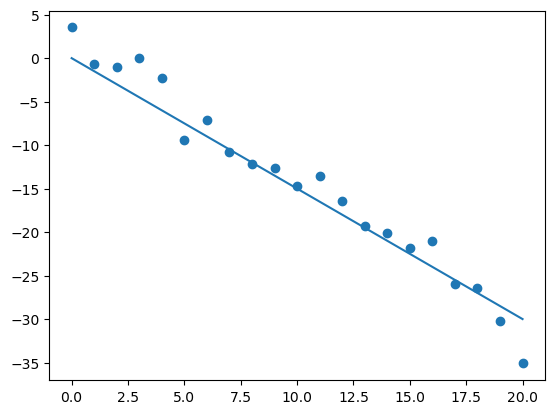

In [2]:
w0 = 0
w1 = -1.5
sigma = 2
X = np.linspace(0.0, 20, 21)
np.random.seed(0)
y = w0 + w1 * X + np.random.normal(0, sigma, X.shape)
plt.scatter(X, y)
plt.plot(X, w0 + w1 * X);

**Ejercicio:** Estudia el comportamiento de regresión lineal simple variando, por separado, el desplazamiento o sesgo $w_0$, el peso o coeficiente de regresión lineal $w_1$, y la varianza $\sigma^2$.

## Ejemplo de regresión cuadrática: reg1d

**Regresión cuadrática simple** es regresión polinómica simple particularizada al caso $D=2$:
$$
p(y\mid x,\boldsymbol\theta)%
=\mathcal{N}(y\mid f(x;\boldsymbol{w}), \sigma^2)
\quad\text{con}\quad%
f(x;\boldsymbol{w})=w_0+w_1x+w_2x^2%
$$

**reg1d** extiende el ejemplo de regresión lineal simple anterior añadiendo $w_2=1/9$:

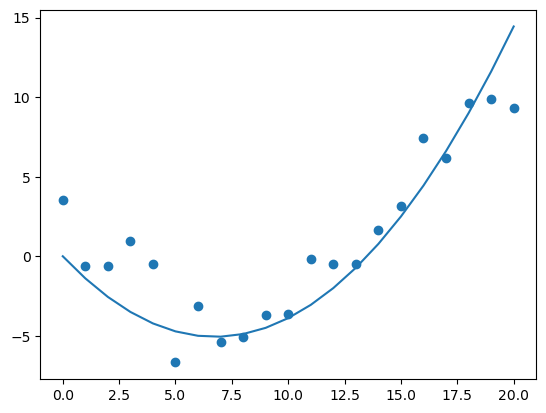

In [3]:
w0 = 0
w1 = -1.5
w2 = 1/9
sigma = 2
X = np.linspace(0.0, 20, 21)
np.random.seed(0)
y = w0 + w1 * X + w2 * X * X + np.random.normal(0, sigma, X.shape)
plt.scatter(X, y)
plt.plot(X, w0 + w1 * X + w2 * X * X);


**Ejercicio:** Estudia el comportamiento de reg1d variando el peso o coeficiente de regresión cuadrática $w_2$.

Definimos una función para generar el corpus reg1d: $N$ datos de entrenamiento y $200$ de test ($x$ de $0$ a $19.9$ con incrementos de $0.1$).

In [4]:
# %load reg1d.py
import numpy as np

def load_reg1d(N=21, random_state=0):
    np.random.seed(random_state)
    X_train = np.linspace(0.0, 20, N)
    X_test = np.arange(0.0, 20, 0.1)
    w0 = 0
    w1 = -1.5
    w2 = 1/9
    sigma = 2
    y_train = w0 + w1 * X_train + w2 * X_train * X_train + np.random.normal(0, sigma, X_train.shape)
    y_test = w0 + w1 * X_test + w2 * X_test * X_test + np.random.normal(0, sigma, X_test.shape)
    return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)


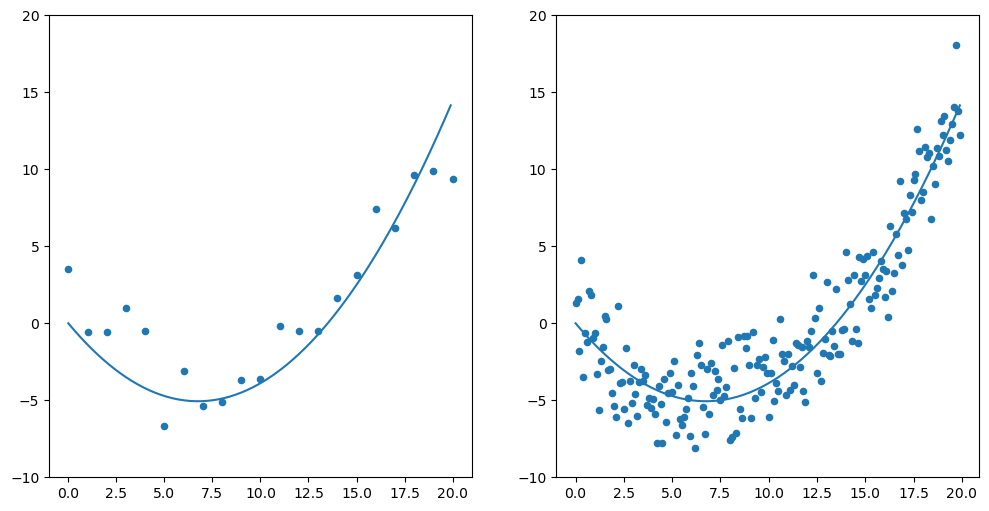

In [5]:
w0 = 0
w1 = -1.5
w2 = 1/9
X_train, y_train, X_test, y_test = load_reg1d()
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].set_ylim([-10, 20])
axes[0].scatter(X_train, y_train, s=20)
axes[0].plot(X_test, w0 + w1 * X_test + w2 * X_test * X_test)
axes[1].set_ylim([-10, 20])
axes[1].scatter(X_test, y_test, s=20)
axes[1].plot(X_test, w0 + w1 * X_test + w2 * X_test * X_test);